In [60]:
import numpy as np

In [48]:

class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data

    """

    def __init__(self, num_iter=1000,reg=1, lr=0.01,no_bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.reg = reg
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
    
    # Add bias column if needed
        if not self.no_bias:
            X = np.hstack([np.ones([n_samples, 1]), X])
    
    # Initialize weights (including bias if needed)
        n_weights = X.shape[1]  # This will be 3 if bias added, 2 if not
        self.weights = np.random.rand(n_weights)
    
        for _ in range(self.iter):
        # Make predictions
            linear_pred = np.dot(X, self.weights)
            y_pred = self.sigmoid(linear_pred)
        
        # Update weights
            self.weights = self.gradient_descent(X, y, y_pred)
        
        # Calculate and record loss
            self.loss[_] = self.loss_function(y_pred, y)
        
        if self.verbose:
            print("Final training loss:", self.loss[-1])
        print("X shape:", X.shape)
        print("weights shape:", self.weights.shape)

        #Output learning process when verbose is set to True
        print("Loss: {}".format(self.loss))
        print("Val_loss: {}".format(self.val_loss))
        
        return self
        pass


    def predict(self, X):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
    
        linearPred = np.dot(X, self.weights.T)
        y_prob = self.sigmoid(linearPred)
        class_prob = [0 if y <= 0.5 else 1 for y in y_prob]
        return class_prob

    def predict_proba(self, X, displayMode=True):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
    
        linearPred = np.dot(X, self.weights.T)
        y_prob = self.sigmoid(linearPred)
        return  np.hstack([(1-y_prob).reshape(-1, 1), y_prob.reshape(-1, 1)]) if displayMode else y_prob

        pass
        return

    def sigmoid(self, X):
        return 1/(1 + np.exp(-X))   
    


    def gradient_descent(self, X, y, y_pred):
        n_samples = X.shape[0]
        dw = (1/n_samples) * np.dot(X.T, (y_pred - y))

        if not self.no_bias:
            db = (1/n_samples) * np.sum(y_pred - y)
            
        self.weights = self.weights - self.lr * dw
        
        return self.weights

    
    def loss_function(self, y_pred, y):
        n_samples = y_pred.shape[0]  # This should be the number of guesses

        if not self.no_bias:
            y = y[1:]
            y_pred = y_pred[1:]
            weights = self.weights[1:]

        # The main loss: How wrong are your confidences?
        log_loss = np.mean((-y * np.log(y_pred)) - (1 - y) * np.log(1 - y_pred))
        
        # The regularization penalty: How extreme are your weights?
        penalty = self.reg * np.sum(self.weights[1:] ** 2) / (2 * n_samples)
        total_loss = log_loss + penalty
        total_loss
        
        return total_loss


In [49]:
def scratch_traintest_split(X, y, train_size=0.8):
    if train_size<=0 or train_size >= 1:
        raise ValueError('train_size={0} should be a float in the '
                         '(0, 1) range'.format(train_size))
    train_size = int(train_size*X.shape[0])
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    split = np.split(X, [train_size])
    X_train = split[0]
    X_test = split[1]
    split = np.split(y, [train_size])
    y_train = split[0]
    y_test = split[1]
    
    return X_train, X_test, y_train, y_test

In [16]:
X = np.array([
    [1, 2],
    [1, 2.2],
    [0.9, 2.5],
    [5, 8],
    [0.6, 1.8],
    [5, 8],
    [5, 8],
    [5.2, 8.2]
])
X.shape


(8, 2)

In [17]:
y = np.array([0, 0, 0, 1, 0, 1, 1, 1])
y.shape

(8,)

In [50]:
slr = ScratchLogisticRegression()
slr.fit(X, y)

X shape: (100, 3)
weights shape: (3,)
Loss: [3.06355995 2.92999543 2.79670971 2.66378543 2.53133073 2.39948688
 2.26843783 2.138422   2.00974652 1.88280368 1.75808876 1.63621753
 1.51793992 1.40414437 1.29584556 1.19414662 1.1001687  1.01494709
 0.93930419 0.87372407 0.81826257 0.77252351 0.73571221 0.70675135
 0.68442438 0.66750947 0.65487879 0.64555544 0.63873347 0.63377235
 0.63017741 0.62757493 0.62568725 0.6243108  0.62329777 0.62254175
 0.62196657 0.62151804 0.62115776 0.62085865 0.62060167 0.62037352
 0.62016492 0.61996944 0.61978263 0.61960147 0.6194239  0.61924852
 0.61907442 0.618901   0.61872787 0.61855481 0.61838168 0.61820841
 0.61803497 0.61786137 0.61768761 0.61751371 0.61733972 0.61716564
 0.61699152 0.61681737 0.61664321 0.61646908 0.61629498 0.61612094
 0.61594696 0.61577306 0.61559926 0.61542555 0.61525194 0.61507845
 0.61490508 0.61473183 0.6145587  0.61438571 0.61421284 0.61404012
 0.61386752 0.61369507 0.61352275 0.61335057 0.61317854 0.61300664
 0.61283489 0.6126

In [19]:
slr.predict(X)

[0, 0, 0, 1, 0, 1, 1, 1]

In [20]:
slr.predict_proba(X)

array([[0.67586559, 0.32413441],
       [0.67998139, 0.32001861],
       [0.70601889, 0.29398111],
       [0.07825877, 0.92174123],
       [0.74887938, 0.25112062],
       [0.07825877, 0.92174123],
       [0.07825877, 0.92174123],
       [0.06687445, 0.93312555]])

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)
lr_predict = lr.predict(X)
display(lr_predict)

array([0, 0, 0, 1, 0, 1, 1, 1])

In [22]:
lr_predict_proba = lr.predict_proba(X)
display(lr_predict_proba)

array([[0.96904855, 0.03095145],
       [0.96410172, 0.03589828],
       [0.95749258, 0.04250742],
       [0.03468182, 0.96531818],
       [0.97841919, 0.02158081],
       [0.03468182, 0.96531818],
       [0.03468182, 0.96531818],
       [0.02690799, 0.97309201]])

# Problem 5: Learning and estimation

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

X = pd.DataFrame(data=load_iris().data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.DataFrame(load_iris().target, columns=[('Species')])
df = pd.concat([X, y], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df = df[["sepal_length", "petal_length", "Species"]][df['Species'] != 0]
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [25]:
X = df[["sepal_length", "petal_length"]].values
y = df['Species'].values

In [26]:
# Encode the Species value from (1,2) to (0,1)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 2) (25, 2) (75,) (25,)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.metrics import *

def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test, predict)
    rec_score = recall_score(test, predict)
    f_score = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print('Accuracy : {:.3f}'.format(acc_score))
    print('Precision: {:.3f}'.format(prec_score))
    print('Recall   : {:.3f}'.format(rec_score))
    print('F        : {:.3f}'.format(f_score))
    print('Confusion matrix:\n', conf_matrix)

In [41]:
# Scratch Logistc regression Learning

slr = ScratchLogisticRegression()
slr.fit(X_train_scaled, y_train, X_test_scaled, y_test)
slr_predict = slr.predict(X_test_scaled)

pd.DataFrame([y_test, slr_predict], index=['Actual value', 'Predicted value'])

X shape: (75, 3)
weights shape: (3,)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual value,1,0,0,0,1,0,0,1,0,1,...,0,1,0,1,1,1,0,1,1,0
Predicted value,0,0,1,0,1,0,0,1,1,1,...,0,1,0,1,1,1,0,1,1,0


In [43]:
evaluation(y_test, slr_predict)

Accuracy : 0.840
Precision: 0.833
Recall   : 0.833
F        : 0.833
Confusion matrix:
 [[11  2]
 [ 2 10]]


In [39]:
# Scikit-learn Logistc regression Learning

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)

pd.DataFrame([y_test, lr_predict], index=['Actual value', 'Predicted value'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual value,1,0,0,0,1,0,0,1,0,1,...,0,1,0,1,1,1,0,1,1,0
Predicted value,0,0,0,0,1,0,0,1,1,1,...,0,1,0,1,1,1,0,1,1,0


In [33]:
evaluation(y_test, lr_predict)

Accuracy : 0.880
Precision: 0.909
Recall   : 0.833
F        : 0.870
Confusion matrix:
 [[12  1]
 [ 2 10]]


In [45]:
# Scratch Learning (with regularization parameter=0.1)

slr2 = ScratchLogisticRegression(reg=0.1)
slr2.fit(X_train_scaled, y_train, X_test_scaled, y_test)
slr2_predict = slr.predict(X_test_scaled)

pd.DataFrame([y_test, slr_predict], index=['Actual value', 'Predicted value'])

X shape: (75, 3)
weights shape: (3,)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual value,1,0,0,0,1,0,0,1,0,1,...,0,1,0,1,1,1,0,1,1,0
Predicted value,0,0,1,0,1,0,0,1,1,1,...,0,1,0,1,1,1,0,1,1,0


In [46]:
evaluation(y_test, slr2_predict)

Accuracy : 0.840
Precision: 0.833
Recall   : 0.833
F        : 0.833
Confusion matrix:
 [[11  2]
 [ 2 10]]


# Problem 6: Plot of learning curve

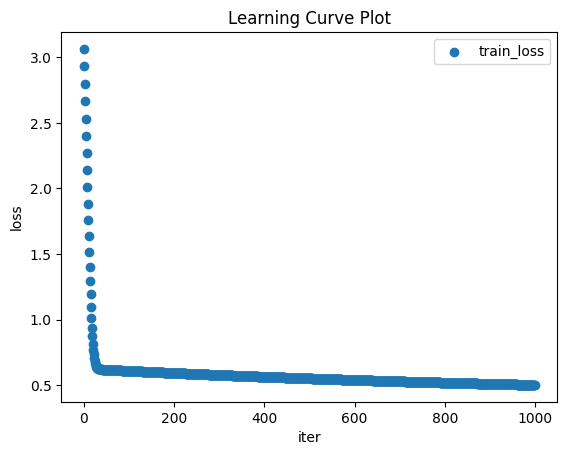

In [51]:
plt.title('Learning Curve Plot')
plt.xlabel('iter')
plt.ylabel('loss')
plt.scatter(range(slr.iter), slr.loss, label='train_loss')
plt.legend()
plt.show()

In [67]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

def decision_region(
    X,
    y,
    model,
    step=0.01,
    title="decision region",
    xlabel="xlabel",
    ylabel="ylabel",
    target_names=["versicolor", "virginica"],
):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ["red", "blue"]
    contourf_color = ["pink", "skyblue"]
    n_class = 2

    # pred
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step),
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = np.array(model.predict(mesh)).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(
        mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_color)
    )
    plt.contour(
        mesh_f0, mesh_f1, y_pred, n_class - 1, colors="y", linewidths=3, alpha=0.5
    )
    for i, target in enumerate(np.unique(y)):
        plt.scatter(
            X[y == target][:, 0],
            X[y == target][:, 1],
            s=80,
            color=scatter_color[i],
            label=target_names[i],
            marker="o",
        )
    patches = [
        mpatches.Patch(color=scatter_color[i], label=target_names[i])
        for i in range(n_class)
    ]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()



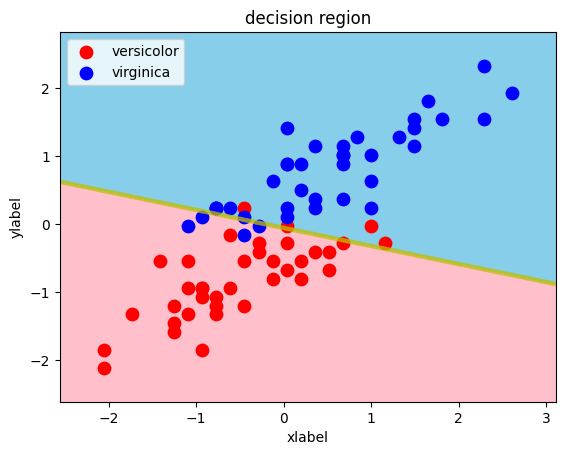

In [68]:
decision_region(X_train_scaled, y_train, slr2) #Scratch (C=0.1)

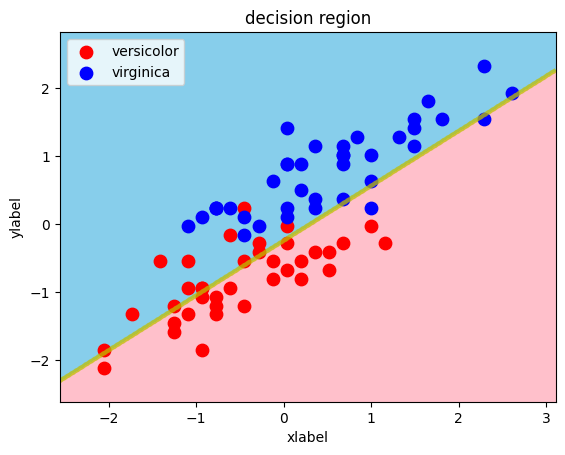

In [69]:
decision_region(X_train_scaled, y_train, slr) 


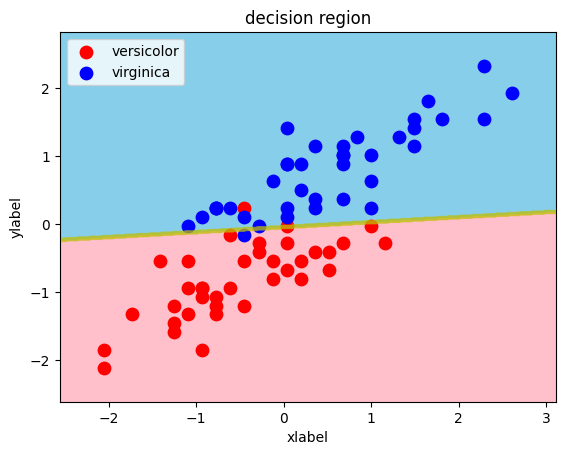

In [70]:
decision_region(X_train_scaled, y_train, lr) 